### Problem 1
### Problem Statement: 
### You are hired by one of the leading news channels CNBE who wants to analyze recent elections. This survey was conducted on 1525 voters with 9 variables. You have to build a model, to predict which party a voter will vote for on the basis of the given information, to create an exit poll that will help in predicting overall win and seats covered by a particular party.
### Data Dictionary:

1. vote: Party choice: Conservative or Labour

2. age: in years

3. economic.cond.national: Assessment of current national economic conditions, 1 to 5.

4. economic.cond.household: Assessment of current household economic conditions, 1 to 5.

5. Blair: Assessment of the Labour leader, 1 to 5.

6. Hague: Assessment of the Conservative leader, 1 to 5.

7. Europe: an 11-point scale that measures respondents' attitudes toward European integration. High scores represent ‘Eurosceptic’ sentiment.

### Importing all the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.style
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

### 1.1 Read the dataset. Do the descriptive statistics and do the null value condition check. Write an inference on it.
### Loading data in Data Frame

In [2]:
df= pd.read_excel("Election_Data.xlsx",sheet_name="Election_Dataset_Two Classes")

### Checking head of the data

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### Checking tail of the data

In [4]:
df.tail()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male
1524,1525,Conservative,74,2,3,2,4,11,0,female


### Dropping column Unnamed: 0

In [5]:
# As this column is of no use
df= df.drop('Unnamed: 0',axis=1)

In [6]:
# Checking the head again after dropping the column Unnamed: 0
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


As the column "Unnamed: 0" is successfully dropped

### Checking shape of the data

In [7]:
df.shape

(1525, 9)

The data have total 1525 rows and 9 columns

### Checking data info

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


All the variables except vote and gender are int64 datatypes.

### Checking null values

In [9]:
df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

The dataset contains no null values.

### Checking duplicates

In [10]:
dups=df.duplicated()
print('Number of duplicate rows= %d' % (dups.sum()))
df[dups]

Number of duplicate rows= 8


,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


We have total 8 number of duplicate rows.

The dataset has few duplicates and removing them is the best choice as duplicates does not add any value.

In [11]:
df.drop_duplicates(inplace=True)

df[dups]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender


In [12]:
# Checking shape of the data after removing duplicate rows
df.shape

(1517, 9)

After removing duplicate rows there are 1517 rows and 9 columns.

In [13]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517,NaN,NaN,NaN,54.2413,15.7017,24,41,53,67,93
economic.cond.national,1517,NaN,NaN,NaN,3.24522,0.881792,1,3,3,4,5
economic.cond.household,1517,NaN,NaN,NaN,3.13777,0.931069,1,3,3,4,5
Blair,1517,NaN,NaN,NaN,3.33553,1.17477,1,2,4,4,5
Hague,1517,NaN,NaN,NaN,2.74951,1.23248,1,2,2,4,5
Europe,1517,NaN,NaN,NaN,6.74028,3.29904,1,4,6,10,11
political.knowledge,1517,NaN,NaN,NaN,1.54054,1.08442,0,0,2,2,3
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
num_df= df[['age','economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']]
num_df.skew().sort_values(ascending=False)

Hague                      0.146191
age                        0.139800
Europe                    -0.141891
economic.cond.household   -0.144148
economic.cond.national    -0.238474
political.knowledge       -0.422928
Blair                     -0.539514
dtype: float64

### 1.2 Perform Univariate and Bivariate Analysis. Do exploratory data analysis. Check for Outliers. 

### Exploratory Data Analysis
### Univariate analysis / Bivariate Analysis
### Data Description

In [15]:
for feature in df.columns:
    if df[feature].dtype=='object':
        print(feature.upper(), " ",df[feature].nunique())
        print(df[feature].value_counts().sort_values())

VOTE   2
Conservative     460
Labour          1057
Name: vote, dtype: int64
GENDER   2
male      709
female    808
Name: gender, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [17]:
def univariateanalysis_numaric(column,nbins):
    print('Description of ' + column)
    print("......................................................")
    print(num_df[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print('Distribution of ' + column)
    print("......................................................")
    sns.distplot(num_df[column],kde=True,color='g');
    plt.show()
    
    plt.figure()
    print('Boxplot of ' + column)
    print("......................................................")
    sns.boxplot(x=num_df[column])
    plt.show()

In [18]:
lstnumariccolumns= list(num_df.columns.values)
len(lstnumariccolumns)

7

Description of age
......................................................
count    1517.000000
mean       54.241266
std        15.701741
min        24.000000
25%        41.000000
50%        53.000000
75%        67.000000
max        93.000000
Name: age, dtype: float64  
Distribution of age
......................................................


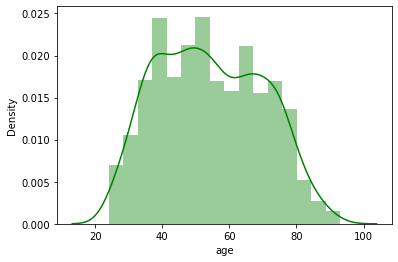

Boxplot of age
......................................................


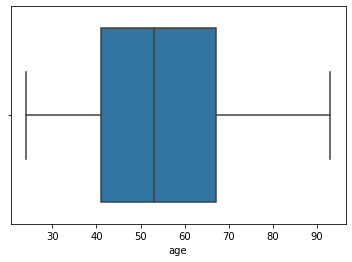

Description of economic.cond.national
......................................................
count    1517.000000
mean        3.245221
std         0.881792
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.national, dtype: float64  
Distribution of economic.cond.national
......................................................


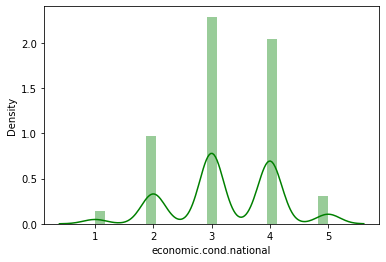

Boxplot of economic.cond.national
......................................................


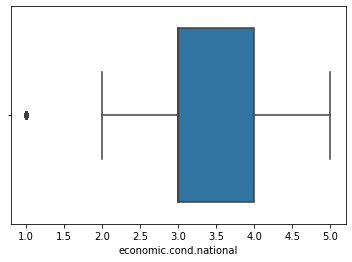

Description of economic.cond.household
......................................................
count    1517.000000
mean        3.137772
std         0.931069
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: economic.cond.household, dtype: float64  
Distribution of economic.cond.household
......................................................


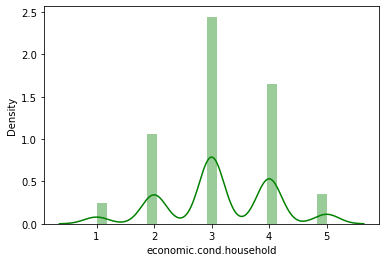

Boxplot of economic.cond.household
......................................................


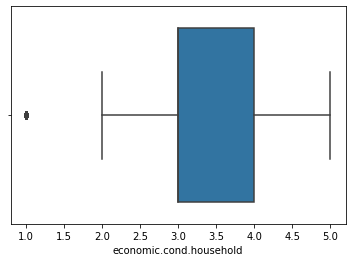

Description of Blair
......................................................
count    1517.000000
mean        3.335531
std         1.174772
min         1.000000
25%         2.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: Blair, dtype: float64  
Distribution of Blair
......................................................


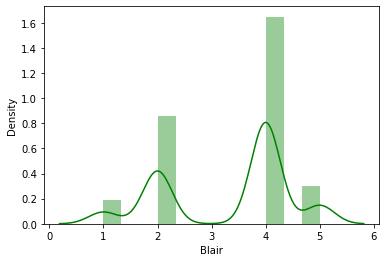

Boxplot of Blair
......................................................


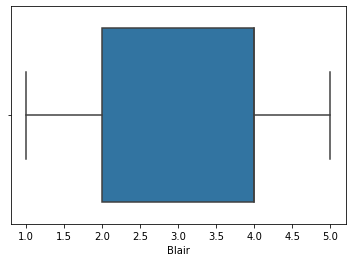

Description of Hague
......................................................
count    1517.000000
mean        2.749506
std         1.232479
min         1.000000
25%         2.000000
50%         2.000000
75%         4.000000
max         5.000000
Name: Hague, dtype: float64  
Distribution of Hague
......................................................


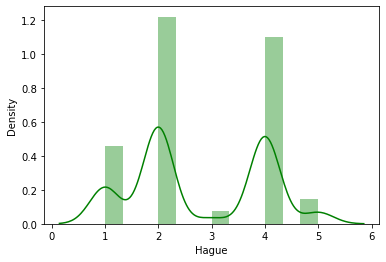

Boxplot of Hague
......................................................


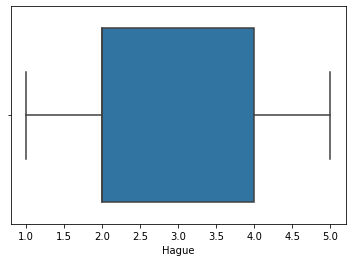

Description of Europe
......................................................
count    1517.000000
mean        6.740277
std         3.299043
min         1.000000
25%         4.000000
50%         6.000000
75%        10.000000
max        11.000000
Name: Europe, dtype: float64  
Distribution of Europe
......................................................


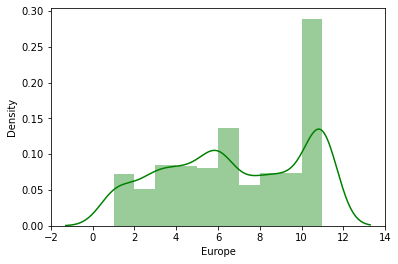

Boxplot of Europe
......................................................


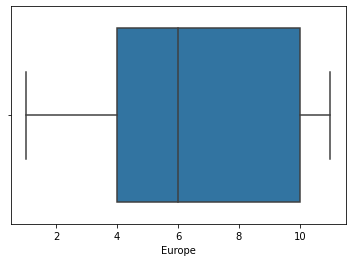

Description of political.knowledge
......................................................
count    1517.000000
mean        1.540541
std         1.084417
min         0.000000
25%         0.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: political.knowledge, dtype: float64  
Distribution of political.knowledge
......................................................


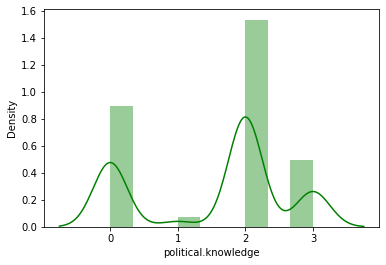

Boxplot of political.knowledge
......................................................


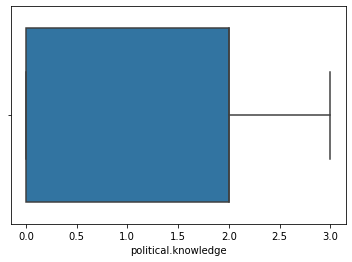

In [19]:
for x in lstnumariccolumns:
    univariateanalysis_numaric(x,20)

age is the only numaric variable,having no outlier and Also, the dist. plot shows that the variable is normally distributed
 
votes are large in number for ‘Labour’

‘female’ voters large in number than ‘male’

### Bivariate and Multivariate Analysis

<AxesSubplot:xlabel='economic.cond.national', ylabel='count'>

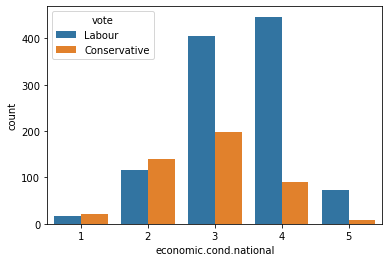

In [20]:
sns.countplot(data=df,x='economic.cond.national',hue='vote')

<AxesSubplot:xlabel='economic.cond.household', ylabel='count'>

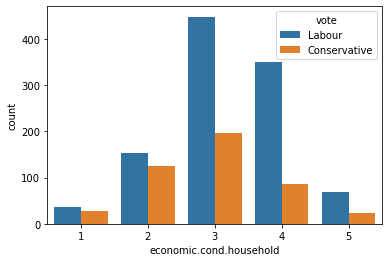

In [21]:
sns.countplot(data=df,x='economic.cond.household',hue='vote')

<AxesSubplot:xlabel='Blair', ylabel='count'>

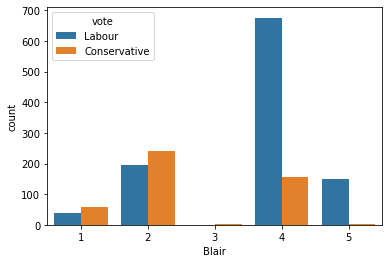

In [22]:
sns.countplot(data=df,x='Blair',hue='vote')

<AxesSubplot:xlabel='Hague', ylabel='count'>

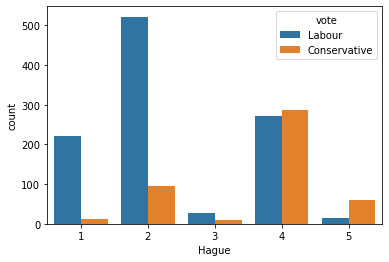

In [23]:
sns.countplot(data=df,x='Hague',hue='vote')

<AxesSubplot:xlabel='Europe', ylabel='count'>

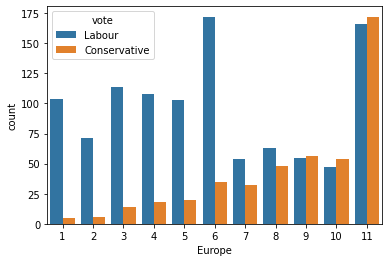

In [24]:
sns.countplot(data=df,x='Europe',hue='vote')

<AxesSubplot:xlabel='political.knowledge', ylabel='count'>

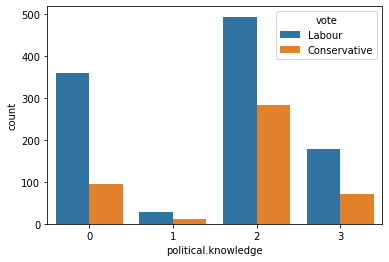

In [25]:
sns.countplot(data=df,x='political.knowledge',hue='vote')

<AxesSubplot:xlabel='gender', ylabel='count'>

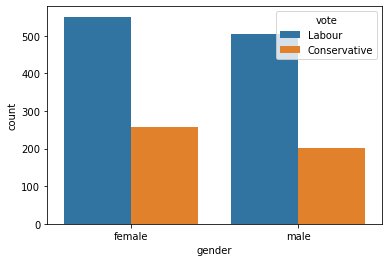

In [26]:
sns.countplot(data=df,x='gender',hue='vote')

Labour gets the highest voting from both female and male voters.
Almost in all the categories Labour is getting the maximum votes.
Conservative gets a little bit high votes from Europe ‘11’.
we could see people who vote Conservative are the people who are older.
In variable Europe ‘1’ are older people.


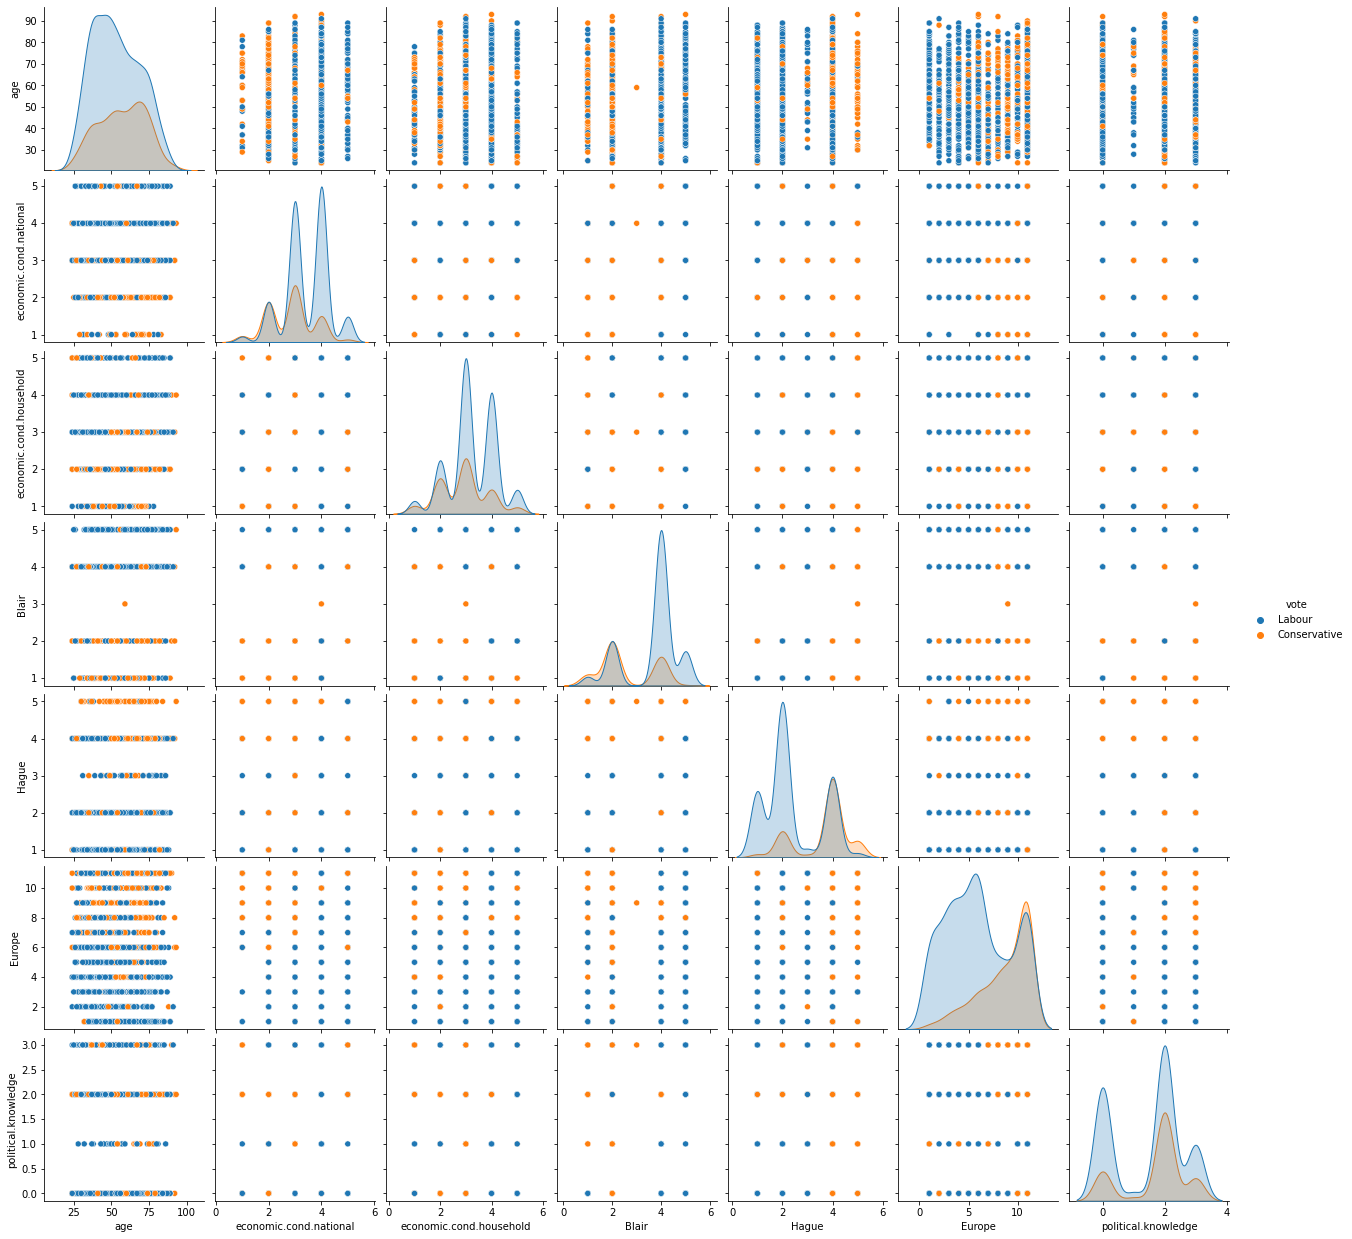

In [27]:
sns.pairplot(data=df,hue='vote')

<AxesSubplot:>

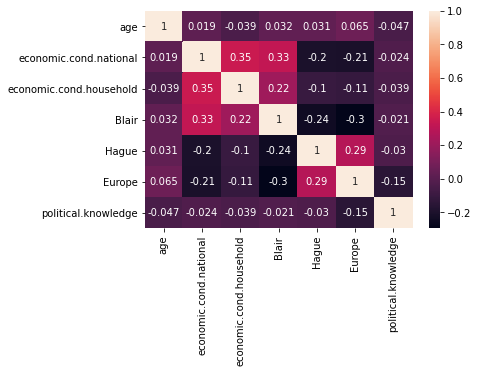

In [28]:
sns.heatmap(df.corr(),annot=True)

There is no correlation between the variable

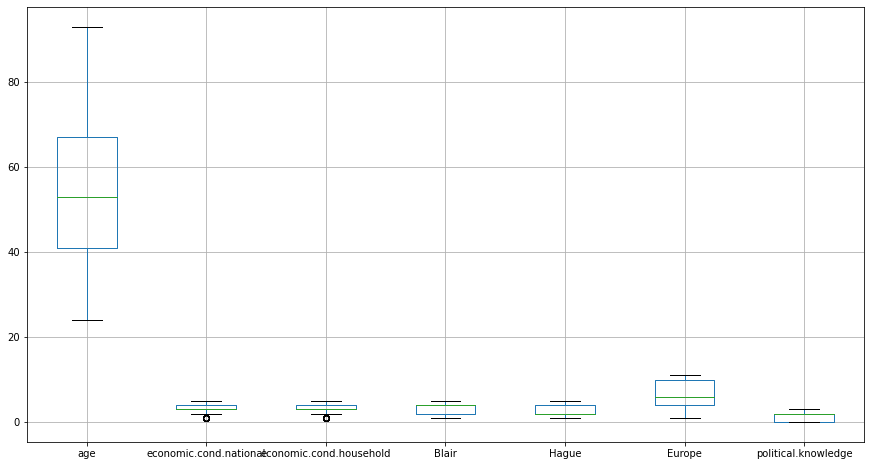

In [29]:
plt.figure(figsize=(15,8))
df.boxplot()
plt.show()

### Treating Outliers
we have outliers in the dataset, as LDA works based on numerical computation treating outliers will help perform the model better

In [30]:
cont1 = df.dtypes[(df.dtypes!='uint8')&(df.dtypes!='object')].index
def remove_outlier(col):
    sorted(col)
    Q1,Q3= np.percentile(col,[25,75])
    IQR= Q3-Q1
    lower_range= Q1-(1.5*IQR)
    upper_range= Q3+(1.5*IQR)
    return lower_range, upper_range

In [31]:
for column in df[cont1].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

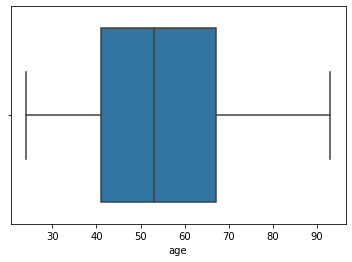

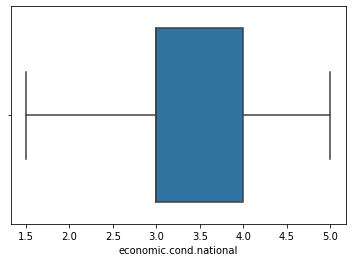

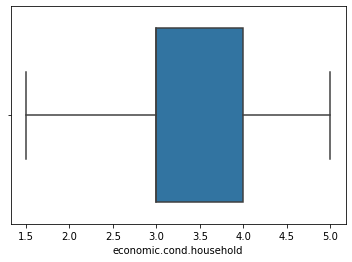

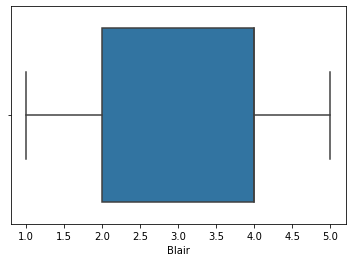

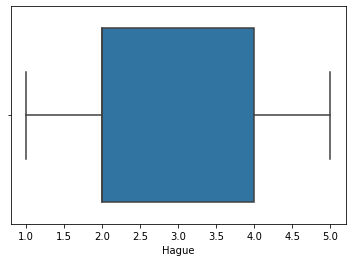

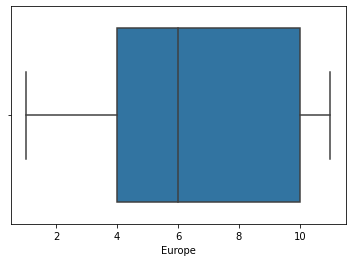

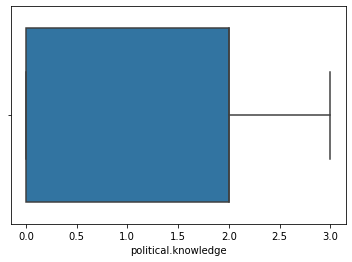

In [32]:
for i in num_df:
    sns.boxplot(df[i])
    plt.show()

Outliers has been treated succesfuly.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1517.0,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,3.257416,0.853647,1.5,3.0,3.0,4.0,5.0
economic.cond.household,1517.0,3.159196,0.886279,1.5,3.0,3.0,4.0,5.0
Blair,1517.0,3.335531,1.174772,1.0,2.0,4.0,4.0,5.0
Hague,1517.0,2.749506,1.232479,1.0,2.0,2.0,4.0,5.0
Europe,1517.0,6.740277,3.299043,1.0,4.0,6.0,10.0,11.0
political.knowledge,1517.0,1.540541,1.084417,0.0,0.0,2.0,2.0,3.0


### 1.3 Encode the data (having string values) for Modelling. Is Scaling necessary here or not? Data Split: Split the data into train and test (70:30).
### Encoding the Data
The variables ‘vote’ and ‘gender’ have string values. Converting them into numeric values for modelling.

In [34]:
# We have two categorical variable as per the data info.
# Converting Categorical variables into Dummy variables in data
data = pd.get_dummies(df,columns=['vote','gender'],drop_first=True)

In [35]:
data.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'vote_Labour', 'gender_male'],
      dtype='object')

In [36]:
data= data.rename(columns={'vote_Labour':'IsLabour_or_Not','gender_male':'IsMale_or_not'},inplace=False)

In [37]:
data.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsLabour_or_Not,IsMale_or_not
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,1,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,1,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


### Scaling
We are not going to scale the data for Logistic regression, LDA and Naive Baye’s models as it is not necessary.


But in case of KNN it is necessary to scale the data, as it a distance-based algorithm (typically based on Euclidean distance). Scaling the data gives similar weightage to all the variables.
### Splitting the data into train and test

In [38]:
# copying all the Predictor variable in x dataframe.
X=data.drop('IsLabour_or_Not',axis=1)

# copying target variable in to y dataframe.
y=data[['IsLabour_or_Not']]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1)

### 1.4 Apply Logistic Regression and LDA (linear discriminant analysis).

### Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression(solver= 'newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    6.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on training and testing set

In [42]:
# Predicting on training set.
y_train_predict = model.predict(X_train)
#predicting on testing set.
y_test_predict = model.predict(X_test)

### Getting probabilities on training and testing set

In [43]:
# Getting probabilities on raining set.
y_train_prob = model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.933264,0.066736
1,0.095272,0.904728
2,0.293630,0.706370
3,0.112030,0.887970
4,0.016233,0.983767


In [44]:
# Getting probabilities on testing set.
y_test_prob = model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.426549,0.573451
1,0.151457,0.848543
2,0.006491,0.993509
3,0.842674,0.157326
4,0.063533,0.936467


### Confusion matrix and classification report on training and testing data
#### Confusion matrix and classification report on training data

Confusion Matrix
[[197 110]
 [ 66 688]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.81      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

 


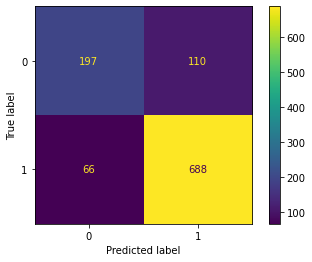

In [45]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train,y_train_predict))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train,y_train_predict))
print(' ')
plot_confusion_matrix(model,X_train,y_train)

#### Confusion matrix and classification report  on testing data

Confusion Matrix
[[111  42]
 [ 36 267]]
 
Classification report
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

 


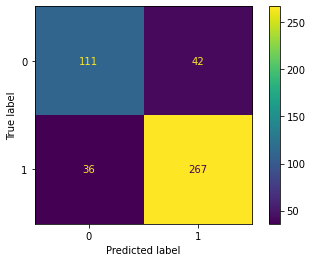

In [46]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_test_predict))
print(" ")
print("Classification report")
print(metrics.classification_report(y_test, y_test_predict)) 
print(" ")
plot_confusion_matrix(model, X_test, y_test)

### Train and Test accuracy,

In [47]:
# Checking train model score,
LR_train_acc = model.score(X_train, y_train)
LR_train_acc

0.8341187558906692

In [48]:
# Checking test model score,
LR_test_acc = model.score(X_test, y_test)
LR_test_acc

0.8289473684210527

### AUC and ROC for training data

AUC: 0.890


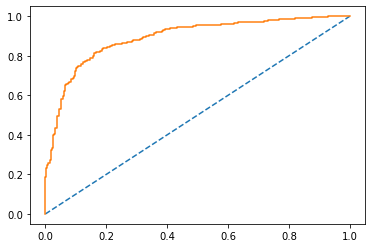

In [49]:
# Predict probabilities
probs = model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
lr_train_auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % lr_train_auc)
# Calculate ROC curve,
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the ROC curve for the model
plt.plot(train_fpr,train_tpr);

### AUC and ROC for testing data

AUC : 0.883


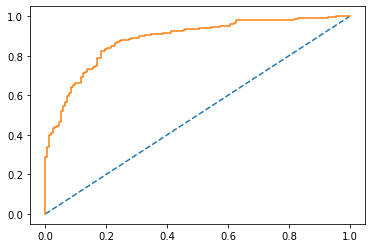

In [50]:
# Predict probabilities
probs = model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
lr_test_auc = roc_auc_score(y_test,probs)
print('AUC : %.3f' % lr_test_auc)
# Calculate IROC curve,
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
# Plot the ROC curve for the model
plt.plot(test_fpr,test_tpr);

The model is not overfitting or underfitting. Training and Testing results shows that the 
model is excellent with good precision and recall values

### LDA  Model (Linear Discriminant Analysis)

In [51]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### Building LDA model

In [52]:
# Applying LDA and fitting the training data
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

### Predicting on training and testing data

In [53]:
#Predicting on training data
y_train_predict = lda_model.predict(X_train)
#Predicting on testing data
y_test_predict = lda_model.predict(X_test)

### Getting probabilities on training and testing set

In [54]:
# Getting probabilities on training set.
y_train_prob = lda_model.predict_proba(X_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.950266,0.049734
1,0.077561,0.922439
2,0.305087,0.694913
3,0.080344,0.919656
4,0.011710,0.988290


In [55]:
# Getting probabilities on testing set.
y_test_prob = lda_model.predict_proba(X_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.465970,0.534030
1,0.137501,0.862499
2,0.005997,0.994003
3,0.866101,0.133899
4,0.053663,0.946337


### Confusion matrix and classification report on training and testing data
#### Confusion matrix and classification report on training data

Confusion Matrix
[[200 107]
 [ 69 685]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.74      0.65      0.69       307
           1       0.86      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061

 


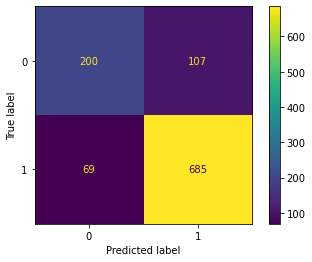

In [56]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train,y_train_predict))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train,y_train_predict))
print(' ')
plot_confusion_matrix(lda_model,X_train,y_train)

#### Confusion matrix and classification report  on testing data

Confusion Matrix
[[111  42]
 [ 35 268]]
 
Classification report
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.81       456
weighted avg       0.83      0.83      0.83       456

 


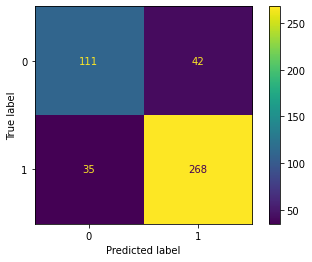

In [57]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_test_predict))
print(" ")
print("Classification report")
print(metrics.classification_report(y_test, y_test_predict)) 
print(" ")
plot_confusion_matrix(lda_model, X_test, y_test)

### Train and Test accuracy,

In [58]:
# Checking train model score,
lda_train_acc = lda_model.score(X_train, y_train)
lda_train_acc

0.8341187558906692

In [59]:
# Checking test model score,
lda_test_acc = lda_model.score(X_test, y_test)
lda_test_acc

0.831140350877193

### AUC and ROC for training data

AUC: 0.890


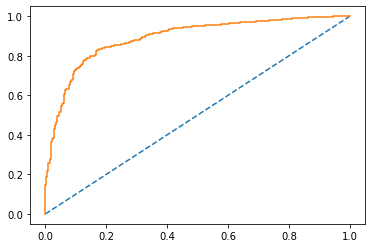

In [60]:
# Predict probabilities
probs = lda_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
lda_train_auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % lda_train_auc)
# Calculate ROC curve,
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the ROC curve for the model
plt.plot(train_fpr,train_tpr);

### AUC and ROC for testing data

AUC : 0.888


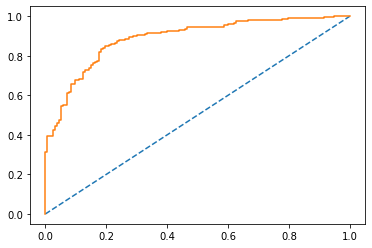

In [61]:
# Predict probabilities
probs = lda_model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
lda_test_auc = roc_auc_score(y_test,probs)
print('AUC : %.3f' % lda_test_auc)
# Calculate IROC curve,
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
# Plot the ROC curve for the model
plt.plot(test_fpr,test_tpr);

Training and Testing results shows that the model is excellent with good precision and recall 
values.
The LDA model is better than Logistic regression with better Test accuracy and recall values.


### 1.5 Apply KNN Model and Naïve Bayes Model. Interpret the results.

In [62]:
# Arrange data into independent variables and dependent variables
x = data.drop('IsLabour_or_Not',axis=1) ## Features
y = data[['IsLabour_or_Not']] ## Target

In [63]:
# Split X and Y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=1)

### Gaussian Naive Bayes

In [64]:
from sklearn.naive_bayes import GaussianNB

In [65]:
NB_model = GaussianNB()
NB_model.fit(x_train,y_train)

GaussianNB()

Now GaussianNB classifier is built. The classifier is trained using training data. We can use fit() method for training it. After building a classifier, our model is ready to make predictions. We can use predict() method with test set features as its parameters.
### Predicting on training and testing data

In [66]:
#Predicting on training data
y_train_pred = NB_model.predict(x_train)
#Predicting on testing data
y_test_pred = NB_model.predict(x_test)

### Getting probabilities on training and testing set

In [67]:
# Getting probabilities on training set.
y_train_prob = NB_model.predict_proba(x_train)
pd.DataFrame(y_train_prob).head()

,0,1
0,0.984814,0.015186
1,0.063996,0.936004
2,0.267047,0.732953
3,0.085261,0.914739
4,0.006036,0.993964


In [68]:
# Getting probabilities on testing set.
y_test_prob = NB_model.predict_proba(x_test)
pd.DataFrame(y_test_prob).head()

,0,1
0,0.553915,0.446085
1,0.131740,0.868260
2,0.000247,0.999753
3,0.947290,0.052710
4,0.030269,0.969731


### Confusion matrix and classification report on training and testing data
#### Confusion matrix and classification report on training data

Confusion Matrix
[[212  95]
 [ 81 673]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.69      0.71       307
           1       0.88      0.89      0.88       754

    accuracy                           0.83      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.83      0.83      1061

 


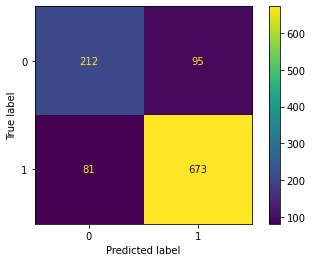

In [69]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_train,y_train_pred))
print(" ")
print("Classification Report")
print(metrics.classification_report(y_train,y_train_pred))
print(' ')
plot_confusion_matrix(NB_model,x_train,y_train)

#### Confusion matrix and classification report on testing data

Confusion Matrix
[[112  41]
 [ 40 263]]
 
Classification report
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

 


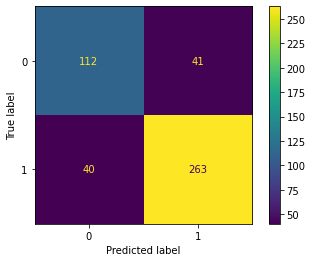

In [70]:
print("Confusion Matrix")
print(metrics.confusion_matrix(y_test, y_test_pred))
print(" ")
print("Classification report")
print(metrics.classification_report(y_test, y_test_pred)) 
print(" ")
plot_confusion_matrix(NB_model, x_test, y_test)

### Train and test accuracy

In [71]:
# Checking train model score,
NB_train_acc = NB_model.score(x_train, y_train)
NB_train_acc

0.8341187558906692

In [72]:
# Checking test model score,
NB_test_acc = NB_model.score(x_test, y_test)
NB_test_acc

0.8223684210526315

### AUC and ROC for training data

AUC: 0.889


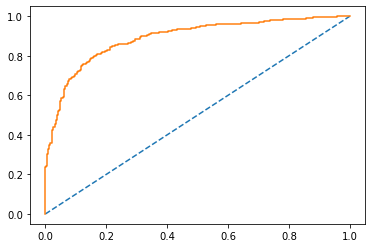

In [73]:
# Predict probabilities
probs = NB_model.predict_proba(x_train)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
NB_train_auc = roc_auc_score(y_train,probs)
print('AUC: %.3f' % NB_train_auc)
# Calculate ROC curve,
train_fpr, train_tpr, train_thresholds = roc_curve(y_train,probs)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the ROC curve for the model
plt.plot(train_fpr,train_tpr);

### AUC and ROC for testing data

AUC : 0.876


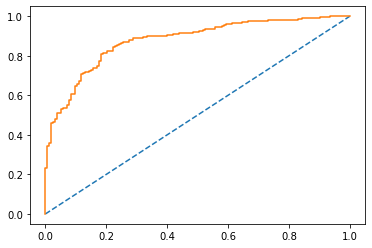

In [74]:
# Predict probabilities
probs = NB_model.predict_proba(x_test)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
NB_test_auc = roc_auc_score(y_test,probs)
print('AUC : %.3f' % NB_test_auc)
# Calculate IROC curve,
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
# Plot the ROC curve for the model
plt.plot(test_fpr,test_tpr);

### KNN Model

In [75]:
# Arrange data into independent variables and dependent variables
X = data.drop('IsLabour_or_Not',axis=1) ## Features
Y = data[['IsLabour_or_Not']] ## Target

In [76]:
X1 = X.copy()

### Data head before Scaling

In [77]:
X1.head() 

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1


#### Generally, good KNN performance usually requires preprocessing of data to make all variables similarly scaled and centered

Now lets apply zscore on continues columns and see the performance for KNN

In [78]:
from scipy.stats import zscore

In [79]:
X1[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","IsMale_or_not"]]=X1[["age","economic.cond.national","economic.cond.household","Blair","Hague","Europe","political.knowledge","IsMale_or_not"]].apply(zscore)

### Data head after Scaling

In [80]:
X1.head() 

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,IsMale_or_not
0,-0.716161,-0.301648,-0.179682,0.565802,-1.419969,-1.437338,0.423832,-0.936736
1,-1.162118,0.870183,0.949003,0.565802,1.014951,-0.527684,0.423832,1.067536
2,-1.225827,0.870183,0.949003,1.417312,-0.608329,-1.134120,0.423832,1.067536
3,-1.926617,0.870183,-1.308366,-1.137217,-1.419969,-0.830902,-1.421084,-0.936736
4,-0.843577,-1.473479,-1.308366,-1.988727,-1.419969,-0.224465,0.423832,1.067536


In [81]:
# Split X and Y into training and test set in 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X1,Y,test_size=0.30,random_state=1)

In [82]:
from sklearn.neighbors import KNeighborsClassifier

### Applying KNN and fitting the training data

In [83]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

### Predicting on training and testing data

In [84]:
#Predicting on training data
Y_train_pred = KNN_model.predict(X_train)
#Predicting on testing data
Y_test_pred = KNN_model.predict(X_test)

### Getting probabilities on training and testing set

In [85]:
# Getting probabilities on training set.
Y_train_prob = KNN_model.predict_proba(X_train)
pd.DataFrame(Y_train_prob).head()

,0,1
0,1.0,0.0
1,0.2,0.8
2,0.4,0.6
3,0.0,1.0
4,0.0,1.0


In [86]:
# Getting probabilities on testing set.
Y_test_prob = KNN_model.predict_proba(X_test)
pd.DataFrame(Y_test_prob).head()

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,0.8,0.2
4,0.0,1.0


### Confusion matrix and classification report on training and testing data
#### Confusion matrix and classification report on training data

Confusion Matrix
[[217  90]
 [ 62 692]]
 
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       307
           1       0.88      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.81      0.82      1061
weighted avg       0.85      0.86      0.85      1061

 


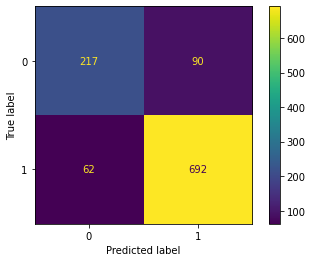

In [87]:
print("Confusion Matrix")
print(metrics.confusion_matrix(Y_train,Y_train_pred))
print(" ")
print("Classification Report")
print(metrics.classification_report(Y_train,Y_train_pred))
print(' ')
plot_confusion_matrix(KNN_model,X_train,Y_train)

### Confusion matrix and classification report on testing data

Confusion Matrix
[[109  44]
 [ 35 268]]
 
Classification report
              precision    recall  f1-score   support

           0       0.76      0.71      0.73       153
           1       0.86      0.88      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.82      0.83      0.83       456

 


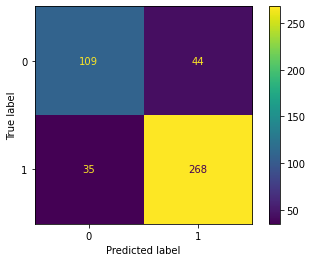

In [88]:
print("Confusion Matrix")
print(metrics.confusion_matrix(Y_test, Y_test_pred))
print(" ")
print("Classification report")
print(metrics.classification_report(Y_test, Y_test_pred)) 
print(" ")
plot_confusion_matrix(KNN_model, X_test, Y_test)

### Train and test accuracy

In [89]:
# Checking train model score,
KNN_train_acc = KNN_model.score(X_train, Y_train)
KNN_train_acc

0.8567389255419415

In [90]:
# Checking test model score,
KNN_test_acc = KNN_model.score(X_test, Y_test)
KNN_test_acc

0.8267543859649122

### AUC and ROC for training data

AUC: 0.929


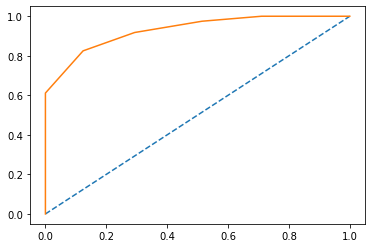

In [91]:
# Predict probabilities
probs = KNN_model.predict_proba(X_train)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
KNN_train_auc = roc_auc_score(Y_train,probs)
print('AUC: %.3f' % KNN_train_auc)
# Calculate ROC curve,
train_fpr, train_tpr, train_thresholds = roc_curve(Y_train,probs)
plt.plot([0,1],[0,1],linestyle = '--')
# plot the ROC curve for the model
plt.plot(train_fpr,train_tpr);

### AUC and ROC for testing data

AUC : 0.870


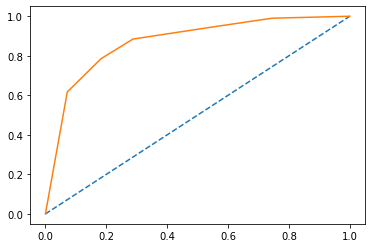

In [92]:
# Predict probabilities
probs = KNN_model.predict_proba(X_test)
# Keep probabilities for the positive outcome only
probs = probs[:,1]
# Calculate AUC,
KNN_test_auc = roc_auc_score(Y_test,probs)
print('AUC : %.3f' % KNN_test_auc)
# Calculate IROC curve,
test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0,1],[0,1],linestyle = '--')
# Plot the ROC curve for the model
plt.plot(test_fpr,test_tpr);

Training and Testing results shows that the model neither overfitting nor underfitting.
The Naive Bayes model also performs well with better accuracy and recall values.
Even though NB and KNN have same Train and Test accuracy. Based on their recall 
value in test dataset it is evident that KNN performs better than Naive Bayes.

### 1.6 Model Tuning, Bagging (Random Forest should be applied for Bagging), and Boosting.
Using GridSearchCV and tuning the model which helps us in finding the best parameters for the model,
### Logistic Regression

In [93]:
from sklearn.model_selection import GridSearchCV
grid = {'penalty': ['l2','none'],
       'solver': ['saga','lbfgs','newton-cg'],
       'tol': [0.1, 0.01, 0.001],
       'max_iter': [100, 200, 300, 400, 500],
       'n_jobs': [1, 2, 3]}

In [94]:
Model = LogisticRegression()

In [95]:
grid_search = GridSearchCV(estimator = Model, param_grid = grid, cv=5)

In [96]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'max_iter': [100, 200, 300, 400, 500],
                         'n_jobs': [1, 2, 3], 'penalty': ['l2', 'none'],
                         'solver': ['saga', 'lbfgs', 'newton-cg'],
                         'tol': [0.1, 0.01, 0.001]})

In [97]:
grid_search.best_params_

{'max_iter': 400, 'n_jobs': 2, 'penalty': 'none', 'solver': 'saga', 'tol': 0.1}

In [98]:
LR1_best_model = grid_search.best_estimator_
LR1_best_model

LogisticRegression(max_iter=400, n_jobs=2, penalty='none', solver='saga',
                   tol=0.1)

### Predicting train and test

In [99]:
# Predicting on train set
y_train_pred =LR1_best_model.predict(X_train)
# Predicting on test set
y_test_pred = LR1_best_model.predict(X_test)

### Getting probabilities on train and test

In [100]:
# Getting probabilities on train set
ytrain_prob = LR1_best_model.predict_proba(X_train)
pd.DataFrame(ytrain_prob).head()

,0,1
0,0.941056,0.058944
1,0.094257,0.905743
2,0.292661,0.707339
3,0.122121,0.877879
4,0.016338,0.983662


In [101]:
# Getting probabilities on test set
ytest_prob = LR1_best_model.predict_proba(X_test)
pd.DataFrame(ytest_prob).head()

,0,1
0,0.443920,0.556080
1,0.146069,0.853931
2,0.006208,0.993792
3,0.849858,0.150142
4,0.065007,0.934993


### Confusion matrix and classification report on training data

0.8341187558906692
[[202 105]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



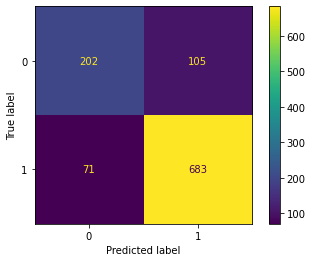

In [102]:
## Performance Matrix on train data set
y_train_predict = LR1_best_model.predict(X_train)
LR1_train_model_score =LR1_best_model.score(X_train, y_train)
print(LR1_train_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(LR1_best_model, X_train,y_train)

### Confusion matrix and classification report on test data

0.8355263157894737
[[114  39]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.84       456



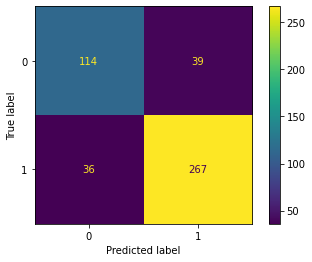

In [103]:
## Performance Matrix on test data set
y_test_predict = LR1_best_model.predict(X_test)
LR1_test_model_score = LR1_best_model.score(X_test, y_test)
print(LR1_test_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(LR1_best_model, X_test,y_test)

### AUC and ROC for Tuned Logistic regression model

AUC: 0.890


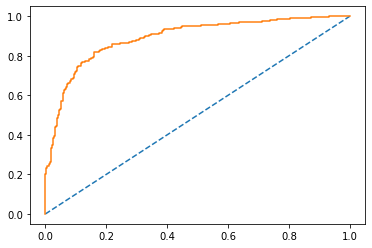

In [104]:
probs_train = LR1_best_model.predict_proba(X_train)

probs_train = probs_train[:, 1]

auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.883


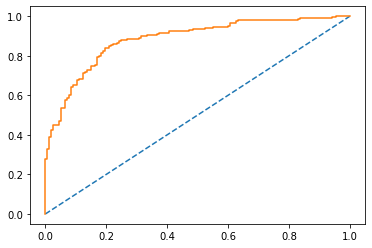

In [105]:
probs_test = LR1_best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Train test accuracy score for tuned Logistic regression model

In [106]:
# Train model score
print(LR1_train_model_score)
# Test model score
print(LR1_test_model_score)

0.8341187558906692
0.8355263157894737


### KNN
Applying KNN model and using the hyperparameter Leaf size and n_neighbour to estimate the model parameters,


In [107]:
# leaf_size = list(range(1,50))
# n_neighbors = list(range(1,30))
# p = [1,2]

Hyper = dict(leaf_size=list(range(1,50)),n_neighbors=list(range(1,30)),p=[1,2])
KNN1 = KNeighborsClassifier()
grid_search = GridSearchCV(KNN1,Hyper,cv=5)

In [108]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29],
                         'p': [1, 2]})

In [109]:
grid_search.best_params_

{'leaf_size': 1, 'n_neighbors': 28, 'p': 1}

In [110]:
KNN_best_model = grid_search.best_estimator_
KNN_best_model

KNeighborsClassifier(leaf_size=1, n_neighbors=28, p=1)

### Predicting on train and test set

In [111]:
# predicting on train set
ytrain_pred = KNN_best_model.predict(X_train)
# Predicting on test set
ytest_pred = KNN_best_model.predict(X_test)

### Getting probabilities on train and test

In [112]:
# Getting probabilities on train set
ytrain_prob = KNN_best_model.predict_proba(X_train)
pd.DataFrame(ytrain_prob).head()

,0,1
0,0.821429,0.178571
1,0.071429,0.928571
2,0.392857,0.607143
3,0.035714,0.964286
4,0.071429,0.928571


In [113]:
# Getting probabilities on test set
ytest_prob = KNN_best_model.predict_proba(X_test)
pd.DataFrame(ytest_prob).head()

,0,1
0,0.607143,0.392857
1,0.107143,0.892857
2,0.000000,1.000000
3,0.857143,0.142857
4,0.107143,0.892857


### Confusion matrix and classification report on training data 

0.8378887841658812
[[203 104]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



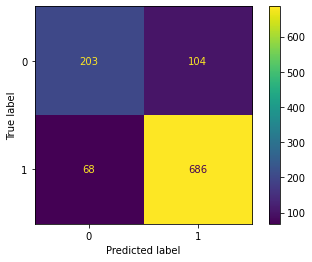

In [114]:
ytrain_pred = KNN_best_model.predict(X_train)
KNN_train_model_score =KNN_best_model.score(X_train, y_train)
print(KNN_train_model_score)
print(metrics.confusion_matrix(y_train, ytrain_pred))
print(metrics.classification_report(y_train, ytrain_pred))
plot_confusion_matrix(KNN_best_model, X_train,y_train)

### Confusion matrix and classification report on test data

0.8289473684210527
[[106  47]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



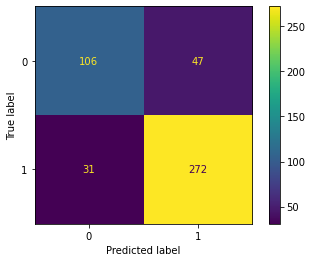

In [115]:
ytest_pred = KNN_best_model.predict(X_test)
KNN_test_model_score =KNN_best_model.score(X_test, y_test)
print(KNN_test_model_score)
print(metrics.confusion_matrix(y_test, ytest_pred))
print(metrics.classification_report(y_test, ytest_pred))
plot_confusion_matrix(KNN_best_model, X_test,y_test)

### KNN Train / test accuracy score

In [116]:
# KNN train accuracy acore 
print(KNN_train_model_score)

0.8378887841658812


In [117]:
# KNN test accuracy acore 
print(KNN_test_model_score)

0.8289473684210527


### Decision Tree Classifier (pruned)

In [118]:
from sklearn.tree import DecisionTreeClassifier

In [119]:
DT = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [120]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

0.8444863336475024
0.7894736842105263


In [121]:
print(pd.DataFrame(DT.feature_importances_, columns = ["Imp"],index = X_train.columns))

                              Imp
age                      0.042957
economic.cond.national   0.063725
economic.cond.household  0.013549
Blair                    0.246707
Hague                    0.435266
Europe                   0.136791
political.knowledge      0.061006
IsMale_or_not            0.000000


### Ensemble Technique - Bagging 
(Decision tree used)


Using Bagging to improve the performance of the model.


Applying the model and predicting the train and test data

In [122]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=DT, n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=50,random_state=1)

bgcl = bgcl.fit(X_train,y_train)

0.8623939679547596
[[217  90]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       307
           1       0.89      0.93      0.91       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



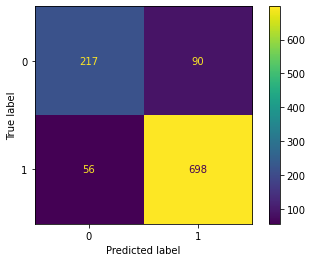

In [123]:
## Performance Matrix on train data set
y_bgcl_train_predict = bgcl.predict(X_train)
train_bgcl_model_score =bgcl.score(X_train, y_train)
print(train_bgcl_model_score)
print(metrics.confusion_matrix(y_train, y_bgcl_train_predict))
print(metrics.classification_report(y_train, y_bgcl_train_predict))
plot_confusion_matrix(bgcl, X_train,y_train)

0.8245614035087719
[[105  48]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



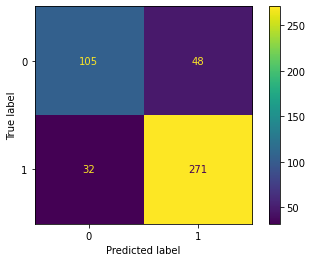

In [124]:
## Performance Matrix on test data set
y_bgcl_test_predict = bgcl.predict(X_test)
test_bgcl_model_score = bgcl.score(X_test, y_test)
print(test_bgcl_model_score)
print(metrics.confusion_matrix(y_test, y_bgcl_test_predict))
print(metrics.classification_report(y_test, y_bgcl_test_predict))
plot_confusion_matrix(bgcl, X_test,y_test)

### Train test score for Bagging

In [125]:
# Accuracy for train data
print(train_bgcl_model_score)
# Accuracy for test data
print(test_bgcl_model_score)

0.8623939679547596
0.8245614035087719


### AUC and ROC for training data for Bagging


AUC: 0.915


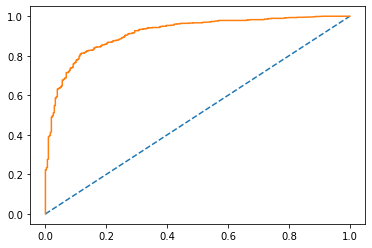

In [126]:
probs = bgcl.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### AUC and ROC for test data for Bagging

AUC: 0.886


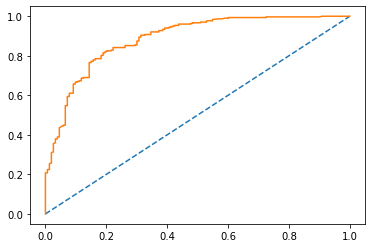

In [127]:
probs_test = bgcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Ada Boosting 

In [128]:
from sklearn.ensemble import AdaBoostClassifier

In [129]:
ADB_model=AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

### Confusion matrix and classification report on train data

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



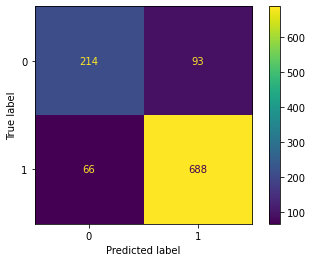

In [130]:
y_train_predict=ADB_model.predict(X_train)
ADB_train_model_score=ADB_model.score(X_train,Y_train)
print(ADB_train_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))
plot_confusion_matrix(ADB_model, X_train,Y_train)

### Confusion matrix and classification report on test data

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



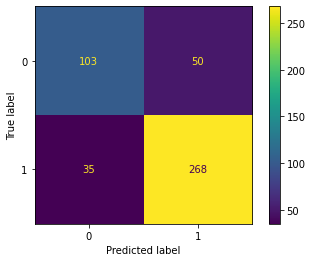

In [131]:
y_test_predict=ADB_model.predict(X_test)
ADB_test_model_score=ADB_model.score(X_test,Y_test)
print(ADB_test_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))
plot_confusion_matrix(ADB_model, X_test,Y_test)

### AUC and ROC for train

AUC: 0.915


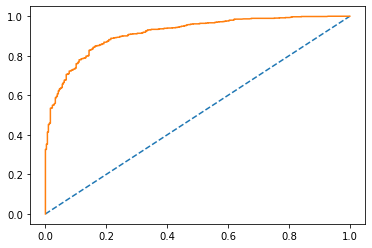

In [132]:
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### AUC and ROC for test

AUC: 0.877


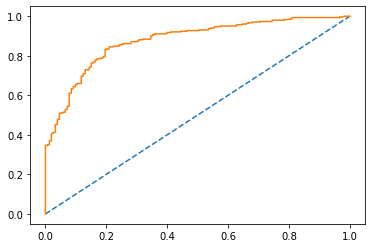

In [133]:
probs = ADB_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Gradient Boosting

In [134]:
from sklearn.ensemble import GradientBoostingClassifier

In [135]:
gbc_model = GradientBoostingClassifier(random_state=1)
gbc_model.fit(X_train,Y_train)

GradientBoostingClassifier(random_state=1)

### Confusion matrix and classification report on train data

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



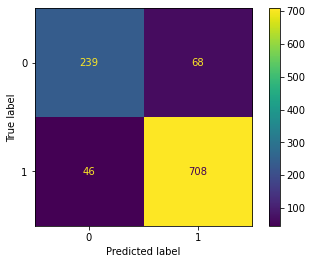

In [136]:
Y_train_predict=gbc_model.predict(X_train)
gbc_train_model_score=gbc_model.score(X_train,Y_train)
print(gbc_train_model_score)

print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))
plot_confusion_matrix(gbc_model, X_train,Y_train)

### Confusion matrix and classification report on test data

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



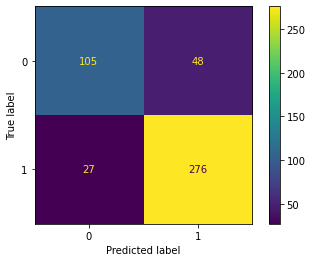

In [137]:
Y_test_predict=gbc_model.predict(X_test)
gbc_test_model_score=gbc_model.score(X_test,Y_test)
print(gbc_test_model_score)

print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))
plot_confusion_matrix(gbc_model, X_test,Y_test)

### AUC and ROC for train

AUC: 0.951


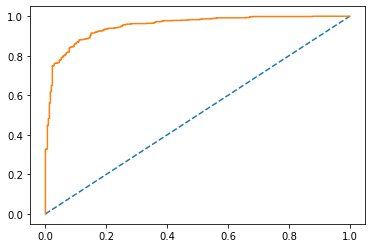

In [138]:
probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### AUC and ROC for test

AUC: 0.899


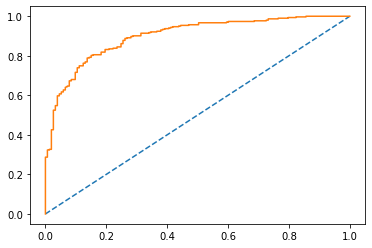

In [139]:
probs = gbc_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Random Forest

In [140]:
from sklearn.ensemble import RandomForestClassifier

In [141]:
rfcl_grid = {
    'max_depth': [8,9,10],
    'max_features': [5,6,7],
    'min_samples_leaf': [9,12,15],
    'min_samples_split': [50,70],
    'n_estimators': [50,100],
    'random_state': [1]
}

rfcl = RandomForestClassifier()
grid_search= GridSearchCV(estimator = rfcl,param_grid = rfcl_grid,cv=5)

In [142]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 9, 10], 'max_features': [5, 6, 7],
                         'min_samples_leaf': [9, 12, 15],
                         'min_samples_split': [50, 70],
                         'n_estimators': [50, 100], 'random_state': [1]})

In [143]:
# The best parameters are,
grid_search.best_params_

{'max_depth': 8,
 'max_features': 5,
 'min_samples_leaf': 15,
 'min_samples_split': 50,
 'n_estimators': 50,
 'random_state': 1}

### Train and test accuracy for random forest

In [144]:
# Train score
RF_train_score = grid_search.score(X_train,y_train)
print(RF_train_score)
# Test score
RF_test_score = grid_search.score(X_test,y_test)
print(RF_test_score)

0.8510838831291234
0.8267543859649122


### Random Forest - Bagging
Applying Bagging on a Random forest model to check its performance and predicting the train and test,

In [145]:
bgcl2 = BaggingClassifier(base_estimator=grid_search,n_estimators=5,random_state=1)
bgcl2 = bgcl2.fit(X_train,y_train)

### Confusion matrix and classification report on train data

0.8623939679547596
[[197 110]
 [ 47 707]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       307
           1       0.87      0.94      0.90       754

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061



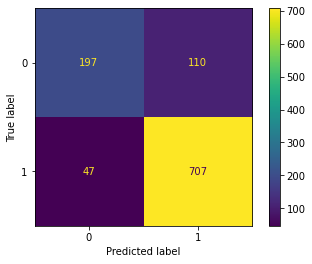

In [146]:
## Performance Matrix on train data set
y_train_predict = bgcl2.predict(X_train)
RF_train_model_score =bgcl.score(X_train, y_train)
print(RF_train_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(bgcl2, X_train,y_train)

### Confusion matrix and classification report on test data

0.8245614035087719
[[ 97  56]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



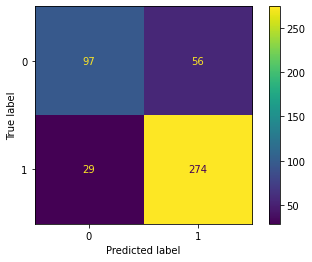

In [147]:
## Performance Matrix on test data set
y_test_predict = bgcl2.predict(X_test)
RF_test_model_score = bgcl.score(X_test, y_test)
print(RF_test_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(bgcl2, X_test,y_test)

### Train test score for random forest- Bagging

In [148]:
y_rf_bg_train = bgcl2.predict(X_train)
print(bgcl2.score(X_train,y_train))
y_rf_bg_test = bgcl2.predict(X_test)
print(bgcl2.score(X_test,y_test))

0.8520263901979265
0.8135964912280702


### AUC and ROC for train data for random forest - Bagging

AUC: 0.912


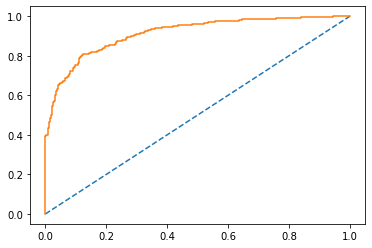

In [149]:
probs = bgcl2.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

### AUC and ROC for test data for random forest - Bagging

AUC: 0.888


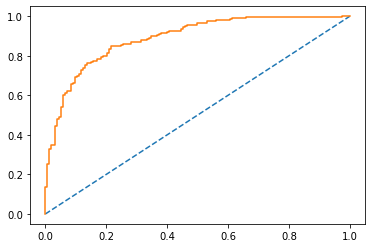

In [150]:
probs_test = bgcl2.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### 1.7 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model. Final Model: Compare the models and write inference which model is best/optimized.
### Tuned Logistic Regression
Logistic regression model performs very good with 83% and 82% accuracy for train and test.

In [151]:
# Train model score
print(LR1_train_model_score)
# Test model score
print(LR1_test_model_score)

0.8341187558906692
0.8355263157894737


### AUC and ROC for tunned logistic regression model

AUC: 0.890


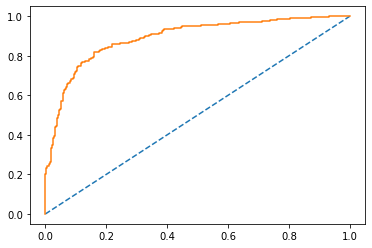

In [152]:
# AUC and roc for train
probs_train = LR1_best_model.predict_proba(X_train)

probs_train = probs_train[:, 1]

auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.883


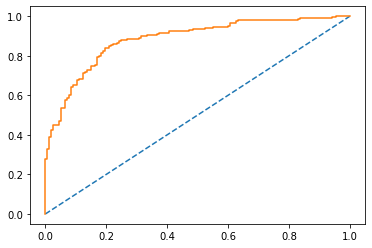

In [153]:
# AUC and ROC for test
probs_test = LR1_best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Confusion matrix and classification report for train

0.8341187558906692
[[202 105]
 [ 71 683]]
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.83      1061
   macro avg       0.80      0.78      0.79      1061
weighted avg       0.83      0.83      0.83      1061



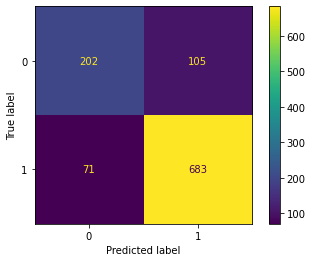

In [154]:
## Performance Matrix on train data set
y_train_predict = LR1_best_model.predict(X_train)
LR1_train_model_score =LR1_best_model.score(X_train, y_train)
print(LR1_train_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(LR1_best_model, X_train,y_train)

### Confusion matrix and classification report for test

0.8355263157894737
[[114  39]
 [ 36 267]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.75       153
           1       0.87      0.88      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.81      0.81       456
weighted avg       0.83      0.84      0.84       456



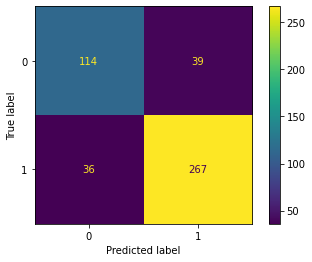

In [155]:
## Performance Matrix on test data set
y_test_predict = LR1_best_model.predict(X_test)
LR1_test_model_score = LR1_best_model.score(X_test, y_test)
print(LR1_test_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(LR1_best_model, X_test,y_test)

### Tuned KNN 
KNN is also performed very good with 83% and 82% train test accuracy score,

In [156]:
# KNN train accuracy score 
print(KNN_train_model_score)
# KNN test accuracy score 
print(KNN_test_model_score)

0.8378887841658812
0.8289473684210527


### Confusion matrix and classification report for train

0.8378887841658812
[[203 104]
 [ 68 686]]
              precision    recall  f1-score   support

           0       0.75      0.66      0.70       307
           1       0.87      0.91      0.89       754

    accuracy                           0.84      1061
   macro avg       0.81      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061



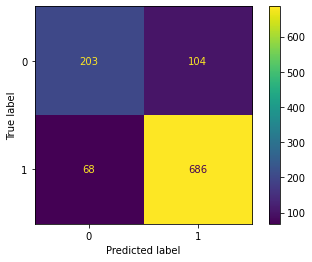

In [157]:
ytrain_pred = KNN_best_model.predict(X_train)
KNN_train_model_score =KNN_best_model.score(X_train, y_train)
print(KNN_train_model_score)
print(metrics.confusion_matrix(y_train, ytrain_pred))
print(metrics.classification_report(y_train, ytrain_pred))
plot_confusion_matrix(KNN_best_model, X_train,y_train)

### Confusion matrix and classification report for test

0.8289473684210527
[[106  47]
 [ 31 272]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.80      0.80       456
weighted avg       0.83      0.83      0.83       456



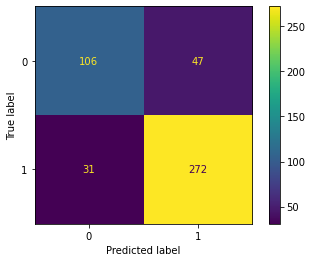

In [158]:
ytest_pred = KNN_best_model.predict(X_test)
KNN_test_model_score =KNN_best_model.score(X_test, y_test)
print(KNN_test_model_score)
print(metrics.confusion_matrix(y_test, ytest_pred))
print(metrics.classification_report(y_test, ytest_pred))
plot_confusion_matrix(KNN_best_model, X_test,y_test)

### AUC and ROC for tuned KNN model

AUC: 0.901


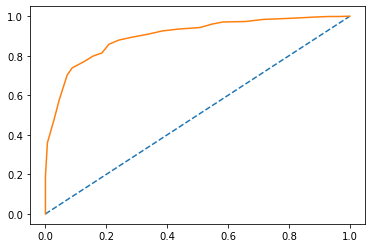

In [159]:
# AUC and ROC for train
probs_train = KNN_best_model.predict_proba(X_train)

probs_train = probs_train[:, 1]

auc = roc_auc_score(y_train, probs_train)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.887


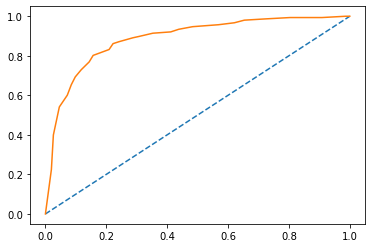

In [160]:
# AUC and ROC for test
probs_test = KNN_best_model.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Decision Tree pruned
Pruning/tuning DT with gini index and max depth = 4, and the model performance is better
And not overfitting with 84% train accuracy and 79% test accuracy.


In [161]:
print(DT.score(X_train, y_train))
print(DT.score(X_test, y_test))

0.8444863336475024
0.7894736842105263


In [162]:
print(pd.DataFrame(DT.feature_importances_, columns = ["Imp"],index = X_train.columns))

                              Imp
age                      0.042957
economic.cond.national   0.063725
economic.cond.household  0.013549
Blair                    0.246707
Hague                    0.435266
Europe                   0.136791
political.knowledge      0.061006
IsMale_or_not            0.000000


### ENsemble Technique - Bagging (Decision tree used )
Decision tree is used as base estimator for Bagging. 

### Model score for train and test

In [163]:
# Accuracy for train data
print(train_bgcl_model_score)
# Accuracy for test data
print(test_bgcl_model_score)

0.8623939679547596
0.8245614035087719


### Confusion matrix and classification report for train

0.8623939679547596
[[217  90]
 [ 56 698]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       307
           1       0.89      0.93      0.91       754

    accuracy                           0.86      1061
   macro avg       0.84      0.82      0.83      1061
weighted avg       0.86      0.86      0.86      1061



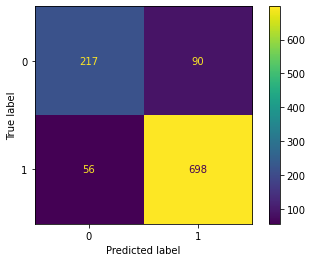

In [164]:
## Performance Matrix on train data set
y_bgcl_train_predict = bgcl.predict(X_train)
train_bgcl_model_score =bgcl.score(X_train, y_train)
print(train_bgcl_model_score)
print(metrics.confusion_matrix(y_train, y_bgcl_train_predict))
print(metrics.classification_report(y_train, y_bgcl_train_predict))
plot_confusion_matrix(bgcl, X_train,y_train)

### Confusion matrix and classification report for test

0.8245614035087719
[[105  48]
 [ 32 271]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.72       153
           1       0.85      0.89      0.87       303

    accuracy                           0.82       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.82      0.82       456



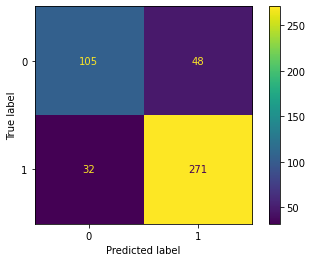

In [165]:
## Performance Matrix on test data set
y_bgcl_test_predict = bgcl.predict(X_test)
test_bgcl_model_score = bgcl.score(X_test, y_test)
print(test_bgcl_model_score)
print(metrics.confusion_matrix(y_test, y_bgcl_test_predict))
print(metrics.classification_report(y_test, y_bgcl_test_predict))
plot_confusion_matrix(bgcl, X_test,y_test)

### AUC and ROC for train and test

AUC: 0.915


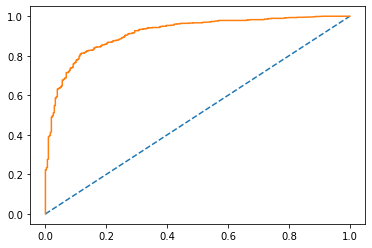

In [166]:
# AUC and ROC for train
probs = bgcl.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.886


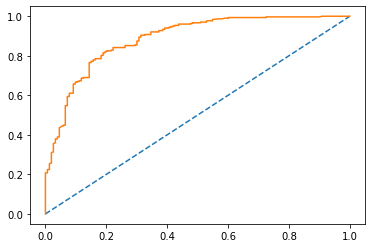

In [167]:
# AUC and ROC for test
probs_test = bgcl.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Ada Boosting
Applying Ada Boosting model and predicting the train and test.
The train and test accuracy are 85% and 81% respecting. We have seen models that performs better than this.
### Model score for train and test

In [186]:
# train model score 
print(ADB_train_model_score)
# test model score
print(ADB_test_model_score)


0.8501413760603205
0.8135964912280702


### Confusion matrix and cllassification report on train

0.8501413760603205
[[214  93]
 [ 66 688]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       307
           1       0.88      0.91      0.90       754

    accuracy                           0.85      1061
   macro avg       0.82      0.80      0.81      1061
weighted avg       0.85      0.85      0.85      1061



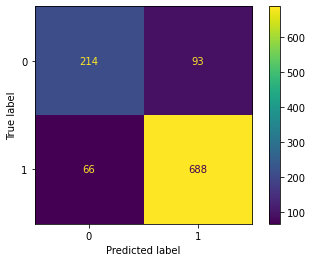

In [169]:
y_train_predict=ADB_model.predict(X_train)
ADB_train_model_score=ADB_model.score(X_train,Y_train)
print(ADB_train_model_score)

print(metrics.confusion_matrix(Y_train,y_train_predict))
print(metrics.classification_report(Y_train,y_train_predict))
plot_confusion_matrix(ADB_model, X_train,Y_train)

### Confusion matrix and cllassification report on test

0.8135964912280702
[[103  50]
 [ 35 268]]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       153
           1       0.84      0.88      0.86       303

    accuracy                           0.81       456
   macro avg       0.79      0.78      0.79       456
weighted avg       0.81      0.81      0.81       456



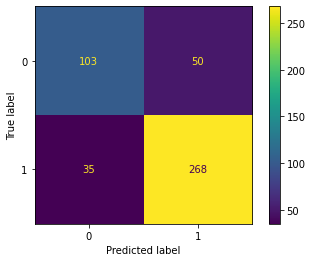

In [171]:
y_test_predict=ADB_model.predict(X_test)
ADB_test_model_score=ADB_model.score(X_test,Y_test)
print(ADB_test_model_score)

print(metrics.confusion_matrix(Y_test,y_test_predict))
print(metrics.classification_report(Y_test,y_test_predict))
plot_confusion_matrix(ADB_model, X_test,Y_test)

### AUC and ROC for train and test

AUC: 0.915


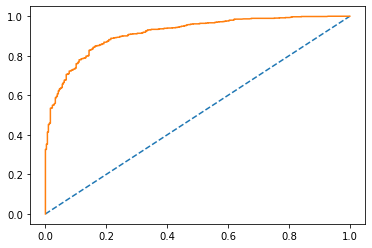

In [172]:
# AUC and ROC for train
probs = ADB_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.877


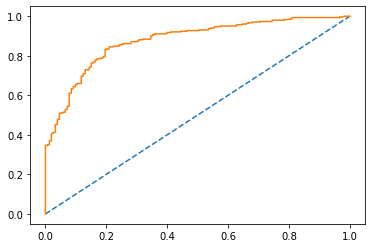

In [173]:
# AUC and ROC for test

probs = ADB_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Gradient Boosting
### Train test accuracy for gradient boosting
Gradient Boosting model performs the best with 89% train accuracy and with 83% test 
accuracy. The precision, recall and f1 score is also good

In [187]:
# Accuracy score for train
print(gbc_train_model_score)
# Accuracy score for test
print(gbc_test_model_score)

0.8925541941564562
0.8355263157894737


### Confusion matrix and cllassification report on train

0.8925541941564562
[[239  68]
 [ 46 708]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       307
           1       0.91      0.94      0.93       754

    accuracy                           0.89      1061
   macro avg       0.88      0.86      0.87      1061
weighted avg       0.89      0.89      0.89      1061



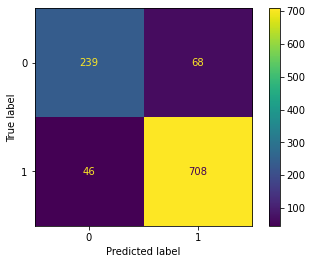

In [175]:
Y_train_predict=gbc_model.predict(X_train)
gbc_train_model_score=gbc_model.score(X_train,Y_train)
print(gbc_train_model_score)

print(metrics.confusion_matrix(Y_train,Y_train_predict))
print(metrics.classification_report(Y_train,Y_train_predict))
plot_confusion_matrix(gbc_model, X_train,Y_train)

### Confusion matrix and cllassification report on test

0.8355263157894737
[[105  48]
 [ 27 276]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       153
           1       0.85      0.91      0.88       303

    accuracy                           0.84       456
   macro avg       0.82      0.80      0.81       456
weighted avg       0.83      0.84      0.83       456



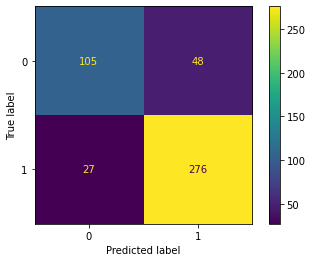

In [176]:
Y_test_predict=gbc_model.predict(X_test)
gbc_test_model_score=gbc_model.score(X_test,Y_test)
print(gbc_test_model_score)

print(metrics.confusion_matrix(Y_test,Y_test_predict))
print(metrics.classification_report(Y_test,Y_test_predict))
plot_confusion_matrix(gbc_model, X_test,Y_test)

### AUC and ROC for train and test

AUC: 0.951


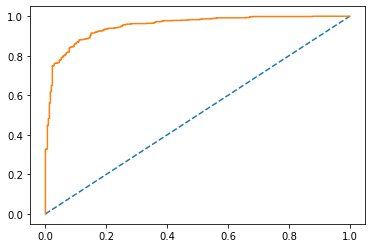

In [177]:
# AUC and ROC for train

probs = gbc_model.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(Y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(Y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.899


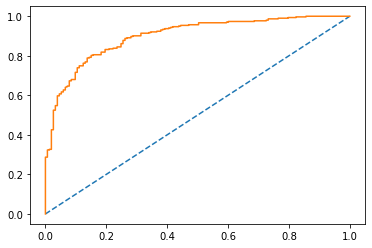

In [178]:
# AUC and ROC for test

probs = gbc_model.predict_proba(X_test)

probs = probs[:, 1]

auc = roc_auc_score(Y_test, probs)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(Y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr)

### Random Forest
### Random Forest train and test accuracy score

In [179]:
# Train score
RF_train_score = grid_search.score(X_train,y_train)
print(RF_train_score)
# Test score
RF_test_score = grid_search.score(X_test,y_test)
print(RF_test_score)

0.8510838831291234
0.8267543859649122


### Random Forest - Bagging
### Random Forest (Bagging) train and test accuracy score
RF model with bagging applied, performs similar to the normal RF as they are not different.
The model has good recall and precision also

In [180]:
# Accuracy on train data
y_rf_bg_train = bgcl2.predict(X_train)
print(bgcl2.score(X_train,y_train))

# Accuracy on test data
y_rf_bg_test = bgcl2.predict(X_test)
print(bgcl2.score(X_test,y_test))

0.8520263901979265
0.8135964912280702


### Confusion matrix and cllassification report on train

0.8623939679547596
[[197 110]
 [ 47 707]]
              precision    recall  f1-score   support

           0       0.81      0.64      0.72       307
           1       0.87      0.94      0.90       754

    accuracy                           0.85      1061
   macro avg       0.84      0.79      0.81      1061
weighted avg       0.85      0.85      0.85      1061



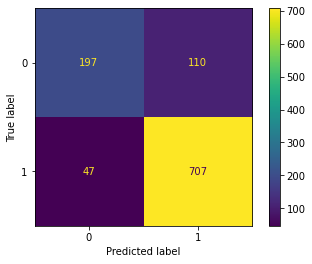

In [181]:
## Performance Matrix on train data set
y_train_predict = bgcl2.predict(X_train)
RF_train_model_score =bgcl.score(X_train, y_train)
print(RF_train_model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))
plot_confusion_matrix(bgcl2, X_train,y_train)

### Confusion matrix and cllassification report on test

0.8245614035087719
[[ 97  56]
 [ 29 274]]
              precision    recall  f1-score   support

           0       0.77      0.63      0.70       153
           1       0.83      0.90      0.87       303

    accuracy                           0.81       456
   macro avg       0.80      0.77      0.78       456
weighted avg       0.81      0.81      0.81       456



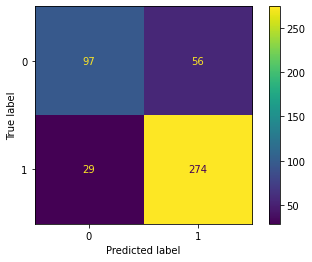

In [182]:
## Performance Matrix on test data set
y_test_predict = bgcl2.predict(X_test)
RF_test_model_score = bgcl.score(X_test, y_test)
print(RF_test_model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))
plot_confusion_matrix(bgcl2, X_test,y_test)

### AUC and ROC for train and test for Random Forest - Bagging

AUC: 0.912


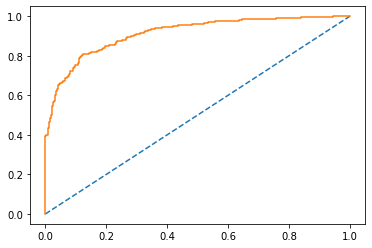

In [183]:
# AUC and ROC for train for Random Forest - Bagging

probs = bgcl2.predict_proba(X_train)

probs = probs[:, 1]

auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr)

AUC: 0.888


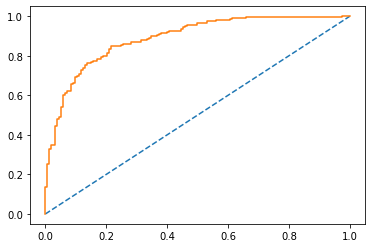

In [184]:
# AUC and ROC for test for Random Forest - Bagging


probs_test = bgcl2.predict_proba(X_test)

probs_test = probs_test[:, 1]

auc = roc_auc_score(y_test, probs_test)
print('AUC: %.3f' % auc)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(test_fpr, test_tpr);

### Model Comparison and best model
Gradient Boosting model performs the best with 89% train accuracy. And also have 91% 
precision and 94% recall which is better than any other models that we have performed in 
here with the Election dataset

In [188]:
# Accuracy score for train
print(gbc_train_model_score)
# Accuracy score for test
print(gbc_test_model_score)

0.8925541941564562
0.8355263157894737


Rest all the models are more or less have same accuracy of 84%

### 1.8 Based on these predictions, what are the insights?
The important variable in predicting the dependent variables are
‘Blair’ and ‘Hague’.

In [190]:
print(pd.DataFrame(DT.feature_importances_,columns = ["Imp"],index=X_train.columns))

                              Imp
age                      0.042957
economic.cond.national   0.063725
economic.cond.household  0.013549
Blair                    0.246707
Hague                    0.435266
Europe                   0.136791
political.knowledge      0.061006
IsMale_or_not            0.000000


These are the ratings that the people gave to the Leaders of the ‘Labour’ and ‘Conservative’ 
party

<AxesSubplot:xlabel='Blair', ylabel='count'>

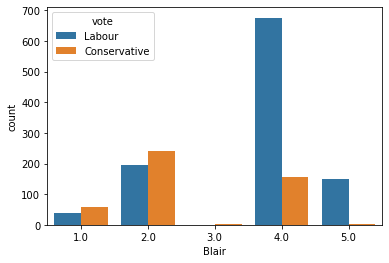

In [191]:
sns.countplot(data=df,x='Blair',hue='vote')

<AxesSubplot:xlabel='Hague', ylabel='count'>

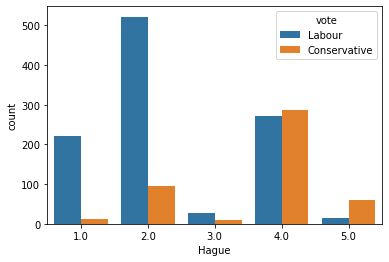

In [192]:
sns.countplot(data=df,x='Hague',hue='vote')

As the frequency distribution suggests most of the people gave 4 stars to ‘Blair’ and there are larger 
number of people gave 2 stars to ‘Hague’ which made an impact in the dependent variable ‘vote’


### Problem 2
### Problem Statement:
### In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:
 1. President Franklin D. Roosevelt in 1941
 2. President John F. Kennedy in 1961
 3. President Richard Nixon in 1973
### 2.1 Find the number of characters, words, and sentences for the mentioned documents.
###  Importing the necessary libraries along with the standard import


In [2]:
import numpy as np 
import pandas as pd 
import re # this is the regular expression library which helps us manipulate text (strings) fairly easily and intuitively
import nltk # this is the Natural Language Tool Kit which contains a lot of functionalities for text analytics
import matplotlib.pyplot as plt
import string # this is used for string manipulations
import matplotlib
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
Roosevelt= inaugural.raw('1941-Roosevelt.txt')
Kennedy= inaugural.raw("1961-Kennedy.txt")
Nixon= inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\terrorist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\terrorist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\terrorist\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


### Number of Characters 

In [3]:
number_of_characters = len(Roosevelt)
print('Number of character in Roosevelt file:',number_of_characters)

number_of_characters =len(Kennedy)
print('Number of character in Kennedy file:',number_of_characters)

number_of_characters =len(Nixon)
print('Number of character in Nixon file:',number_of_characters)



Number of character in Roosevelt file: 7571
Number of character in Kennedy file: 7618
Number of character in Nixon file: 9991


### Number of words in each text file

In [4]:
x = inaugural.raw('1961-Kennedy.txt')
words = x.split()
print('Number of words in Kennedy file:',len(words))

Number of words in Kennedy file: 1390


In [5]:
x = inaugural.raw('1973-Nixon.txt')
words = x.split()
print('Number of words in Nixon file:',len(words))

Number of words in Nixon file: 1819


In [6]:
x = inaugural.raw('1941-Roosevelt.txt')
words = x.split()
print('Number of words in Roosevelt file:',len(words))

Number of words in Roosevelt file: 1360


### Number of Sentences

In [7]:
y = pd.DataFrame({'Text':inaugural.raw('1973-Nixon.txt')},index=[0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Mr. Vice President, Mr. Speaker, Mr. Chief Jus...",68


In [8]:
y = pd.DataFrame({'Text':inaugural.raw('1961-Kennedy.txt')},index=[0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,"Vice President Johnson, Mr. Speaker, Mr. Chief...",52


In [9]:
y = pd.DataFrame({'Text':inaugural.raw('1941-Roosevelt.txt')},index=[0])
y['sentences'] = y['Text'].apply(lambda x: len([x for x in x.split() if x.endswith('.')]))
y

,Text,sentences
0,On each national day of inauguration since 178...,67


President Franklin D. Roosevelt’s speech have 7571 Characters (including spaces) and 1360 words. 


President John F. Kennedy’s Speech have 7618 Characters (including spaces) and 1390 words.


President Richard Nixon’s Speech have 9991 Characters (including spaces) and 1819 words.


### 2.2 Remove all the stopwords from all three speeches. 

In [10]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [11]:
# Remove all the stopwords from Roosevelt

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Roosevelt)

filtered_sentence = [w for w in word_tokens if not w in stop_words] 

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)        
print(filtered_sentence)

['On', 'each', 'national', 'day', 'of', 'inauguration', 'since', '1789', ',', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'United', 'States', '.', 'In', 'Washington', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', '.', 'In', 'Lincoln', "'s", 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'Nation', 'from', 'disruption', 'from', 'within', '.', 'In', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'Nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', '.', 'To', 'us', 'there', 'has', 'come', 'a', 'time', ',', 'in', 'the', 'midst', 'of', 'swift', 'happenings', ',', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', '--', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', ',', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', '.',

In [12]:
# Remove all the stopwords from Kennedy

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Kennedy)

filtered_sentence = [w for w in word_tokens if not w in stop_words] 

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)        
print(filtered_sentence)

['Vice', 'President', 'Johnson', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'President', 'Eisenhower', ',', 'Vice', 'President', 'Nixon', ',', 'President', 'Truman', ',', 'reverend', 'clergy', ',', 'fellow', 'citizens', ',', 'we', 'observe', 'today', 'not', 'a', 'victory', 'of', 'party', ',', 'but', 'a', 'celebration', 'of', 'freedom', '--', 'symbolizing', 'an', 'end', ',', 'as', 'well', 'as', 'a', 'beginning', '--', 'signifying', 'renewal', ',', 'as', 'well', 'as', 'change', '.', 'For', 'I', 'have', 'sworn', 'I', 'before', 'you', 'and', 'Almighty', 'God', 'the', 'same', 'solemn', 'oath', 'our', 'forebears', 'l', 'prescribed', 'nearly', 'a', 'century', 'and', 'three', 'quarters', 'ago', '.', 'The', 'world', 'is', 'very', 'different', 'now', '.', 'For', 'man', 'holds', 'in', 'his', 'mortal', 'hands', 'the', 'power', 'to', 'abolish', 'all', 'forms', 'of', 'human', 'poverty', 'and', 'all', 'forms', 'of', 'human', 'life', '.', 'And', 'yet', 'the', 'same', 'revolutionary', 

In [13]:
# Remove all the stopwords from Nixon

stop_words = set(stopwords.words('english'))

word_tokens = word_tokenize(Nixon)

filtered_sentence = [w for w in word_tokens if not w in stop_words] 

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(word_tokens)        
print(filtered_sentence)

['Mr.', 'Vice', 'President', ',', 'Mr.', 'Speaker', ',', 'Mr.', 'Chief', 'Justice', ',', 'Senator', 'Cook', ',', 'Mrs.', 'Eisenhower', ',', 'and', 'my', 'fellow', 'citizens', 'of', 'this', 'great', 'and', 'good', 'country', 'we', 'share', 'together', ':', 'When', 'we', 'met', 'here', 'four', 'years', 'ago', ',', 'America', 'was', 'bleak', 'in', 'spirit', ',', 'depressed', 'by', 'the', 'prospect', 'of', 'seemingly', 'endless', 'war', 'abroad', 'and', 'of', 'destructive', 'conflict', 'at', 'home', '.', 'As', 'we', 'meet', 'here', 'today', ',', 'we', 'stand', 'on', 'the', 'threshold', 'of', 'a', 'new', 'era', 'of', 'peace', 'in', 'the', 'world', '.', 'The', 'central', 'question', 'before', 'us', 'is', ':', 'How', 'shall', 'we', 'use', 'that', 'peace', '?', 'Let', 'us', 'resolve', 'that', 'this', 'era', 'we', 'are', 'about', 'to', 'enter', 'will', 'not', 'be', 'what', 'other', 'postwar', 'periods', 'have', 'so', 'often', 'been', ':', 'a', 'time', 'of', 'retreat', 'and', 'isolation', 'that'

### 2.3 Which word occurs the most number of times in his inaugural address for each president? Mention the top three words. (after removing the stopwords)

In [14]:
from nltk.tokenize import RegexpTokenizer
from collections import Counter

In [15]:
# Total number of words in roosevelt speech
tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Roosevelt)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Nation', 12),
 ('Know', 10),
 ('Spirit', 9),
 ('Life', 9),
 ('Democracy', 9),
 ('Us', 8),
 ('People', 7),
 ('America', 7),
 ('Years', 6),
 ('Freedom', 6),
 ('Human', 5),
 ('New', 5),
 ('Body', 5),
 ('Mind', 5),
 ('Speaks', 5),
 ('Day', 4),
 ('States', 4),
 ('Government', 4),
 ('Must', 4),
 ('Something', 4),
 ('Faith', 4),
 ('United', 3),
 ('Task', 3),
 ('Within', 3),
 ('History', 3),
 ('Nations', 3),
 ('Three', 3),
 ('Live', 3),
 ('Future', 3),
 ('Free', 3),
 ('Alone', 3),
 ('Still', 3),
 ('Every', 3),
 ('Continent', 3),
 ('Like', 3),
 ('Person', 3),
 ('World', 3),
 ('Sacred', 3),
 ('Came', 3),
 ('First', 3),
 ('Destiny', 3),
 ('National', 2),
 ('1789', 2),
 ('Sense', 2),
 ('Washington', 2),
 ('Create', 2),
 ('Together', 2),
 ('Disruption', 2),
 ('Without', 2),
 ('Time', 2),
 ('Midst', 2),
 ('Stock', 2),
 ('May', 2),
 ('Lives', 2),
 ('Little', 2),
 ('Measure', 2),
 ('Doubt', 2),
 ('Measured', 2),
 ('Americans', 2),
 ('True', 2),
 ('Republic', 2),
 ('Acted', 2),
 ('Security', 2),
 ('

The top three words are 
Nation ,
know and
Spirit.

In [16]:
# Total number of words in Kennedy speech
tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Kennedy)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Let', 16),
 ('Us', 12),
 ('World', 8),
 ('Sides', 8),
 ('New', 7),
 ('Pledge', 7),
 ('Citizens', 5),
 ('Power', 5),
 ('Shall', 5),
 ('Free', 5),
 ('Nations', 5),
 ('Ask', 5),
 ('President', 4),
 ('Fellow', 4),
 ('Freedom', 4),
 ('First', 4),
 ('Americans', 4),
 ('Peace', 4),
 ('Always', 4),
 ('Cannot', 4),
 ('Hope', 4),
 ('Help', 4),
 ('Arms', 4),
 ('Country', 4),
 ('Call', 4),
 ('Today', 3),
 ('Well', 3),
 ('God', 3),
 ('Human', 3),
 ('Poverty', 3),
 ('Life', 3),
 ('Globe', 3),
 ('Dare', 3),
 ('Go', 3),
 ('Generation', 3),
 ('Know', 3),
 ('Bear', 3),
 ('Control', 3),
 ('May', 3),
 ('Good', 3),
 ('Join', 3),
 ('Begin', 3),
 ('Never', 3),
 ('Final', 3),
 ('Vice', 2),
 ('Mr', 2),
 ('Forebears', 2),
 ('Century', 2),
 ('Hands', 2),
 ('Forms', 2),
 ('Yet', 2),
 ('Around', 2),
 ('Rights', 2),
 ('Hand', 2),
 ('Revolution', 2),
 ('Word', 2),
 ('Forth', 2),
 ('Time', 2),
 ('Friend', 2),
 ('Foe', 2),
 ('Passed', 2),
 ('Nation', 2),
 ('Committed', 2),
 ('Every', 2),
 ('Whether', 2),
 ('Burden'

The top three words are Let, Us and World.

In [17]:
# Total number of words in Nixon speech
tokenizer = RegexpTokenizer(r'\w+')
roosevelt_no_punc = tokenizer.tokenize(Nixon)
set(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict = Counter(w.title() for w in roosevelt_no_punc if w.lower() not in stopwords.words())
word_count_dict.most_common()

[('Us', 26),
 ('Let', 22),
 ('America', 21),
 ('Peace', 19),
 ('World', 18),
 ('New', 15),
 ('Nation', 11),
 ('Responsibility', 11),
 ('Government', 10),
 ('Great', 9),
 ('Home', 9),
 ('Abroad', 8),
 ('Together', 7),
 ('Years', 7),
 ('Shall', 7),
 ('Policies', 7),
 ('Role', 7),
 ('Make', 7),
 ('Every', 7),
 ('History', 7),
 ('Better', 7),
 ('Time', 6),
 ('Right', 6),
 ('People', 6),
 ('Help', 6),
 ('Four', 5),
 ('Today', 5),
 ('Responsibilities', 5),
 ('Progress', 5),
 ('Respect', 5),
 ('Others', 5),
 ('Act', 5),
 ('Promise', 4),
 ('Long', 4),
 ('Work', 4),
 ('Freedom', 4),
 ('God', 4),
 ('Old', 4),
 ('Proud', 4),
 ('Faith', 4),
 ('Mr', 3),
 ('Country', 3),
 ('Share', 3),
 ('Resolve', 3),
 ('Retreat', 3),
 ('Greatly', 3),
 ('Century', 3),
 ('Nations', 3),
 ('Bold', 3),
 ('Another', 3),
 ('Future', 3),
 ('Forward', 3),
 ('Build', 3),
 ('Structure', 3),
 ('Live', 3),
 ('System', 3),
 ('Gladly', 3),
 ('Challenges', 3),
 ('Away', 3),
 ('Way', 3),
 ('Individual', 3),
 ('Ask', 3),
 ('Ashamed

The top three words are Us, Let and America.

### 2.4 Plot the word cloud of each of the speeches of the variable. (after removing the stopwords)

In [19]:
import re
from wordcloud import WordCloud ,STOPWORDS
import pandas as pd
from nltk.tokenize import word_tokenize


### Plotting wordcloud for Roosevelt

In [20]:
import numpy as np
from PIL import Image
# create stopword list:
text = inaugural.raw('1941-Roosevelt.txt')
# clean text
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')


In [21]:
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis("off");

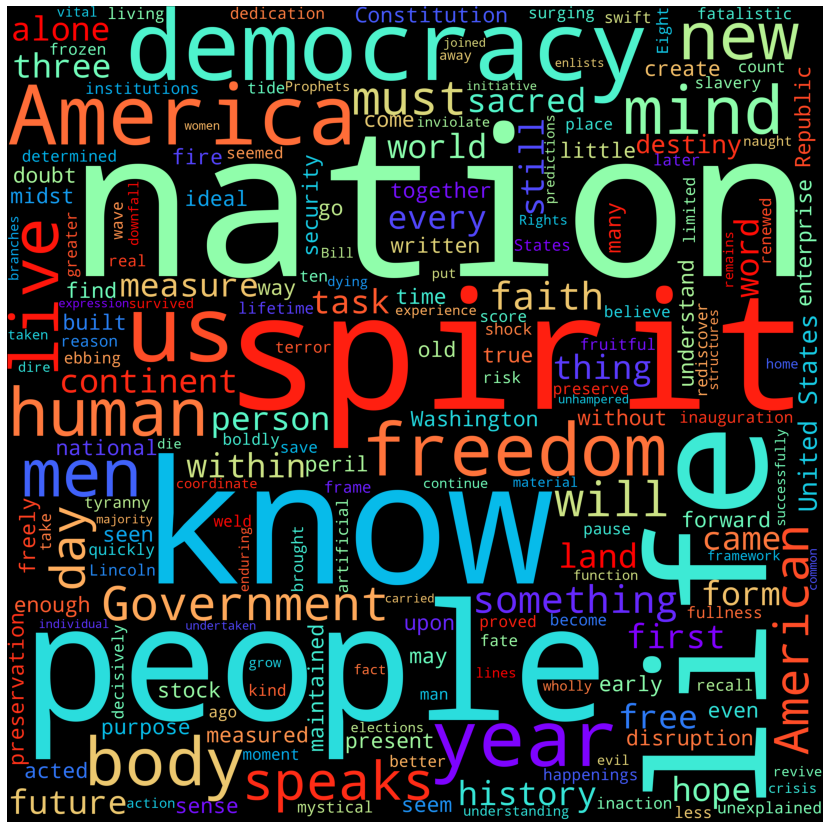

In [24]:
wordcloud = WordCloud(width=3000 , height=3000, random_state=100, background_color='black',colormap= 'rainbow',min_font_size=10).generate(text)
plot_cloud(wordcloud)

### Wordcloud for Kennedy

In [25]:
# create stopword list:
text = inaugural.raw('1961-Kennedy.txt')
# clean text
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis("off");

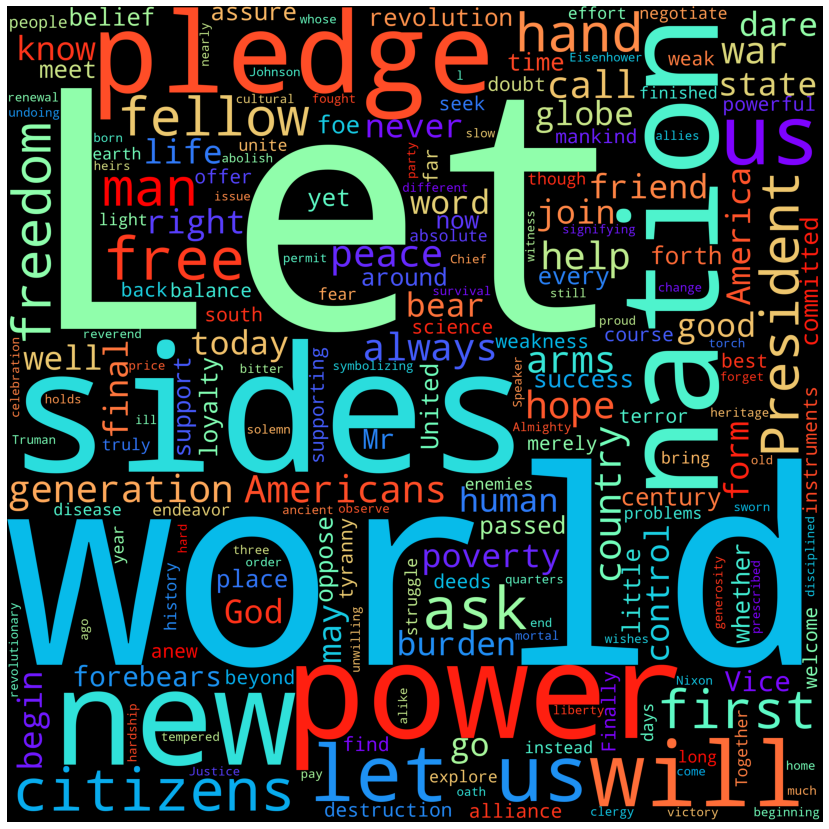

In [26]:
wordcloud = WordCloud(width=3000 , height=3000, random_state=100, background_color='black',colormap= 'rainbow',min_font_size=10).generate(text)
plot_cloud(wordcloud)

### Wordcloud for Nixon

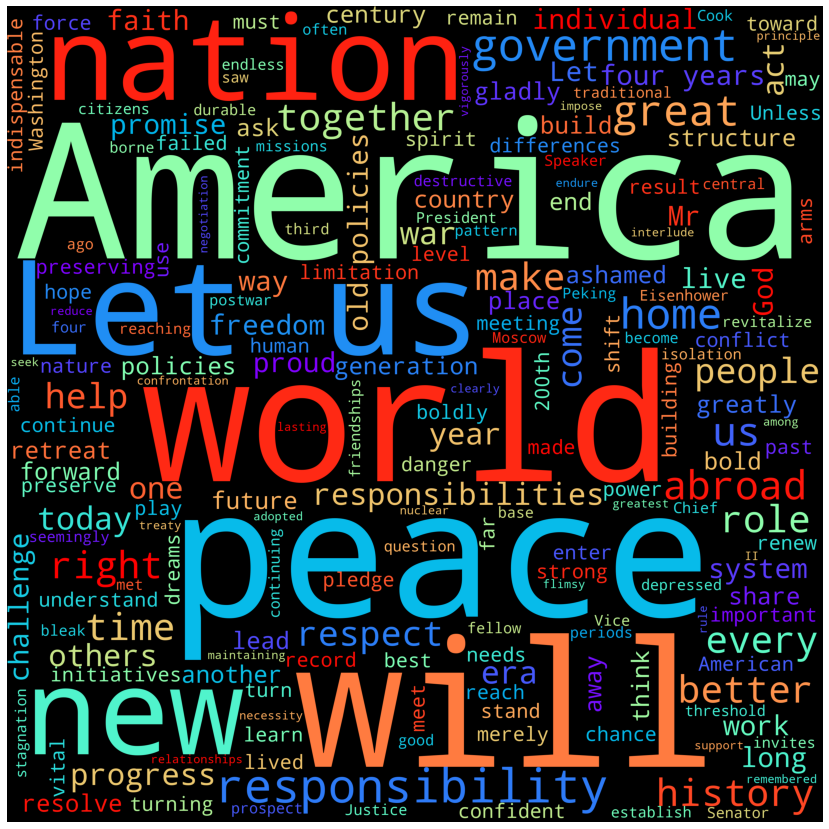

In [27]:
# create stopword list:
text = inaugural.raw('1973-Nixon.txt')
# clean text
text = re.sub(r'==.*?==+, ', '', text)
text = text.replace('\n', '')
%matplotlib inline
def plot_cloud(wordcloud):
    plt.figure(figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis("off");
    
wordcloud = WordCloud(width=3000 , height=3000, random_state=100, background_color='black',colormap= 'rainbow',min_font_size=10).generate(text)
plot_cloud(wordcloud)    